In [2]:
#Įsikeliame reikalingas bibliotekas


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

import keras

from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

In [3]:
#Įsikeliame duomenis

(X_train, y_train), (X_test, y_test) =  keras.datasets.mnist.load_data()

170500096/170498071 [==============================] - 18s 0us/step


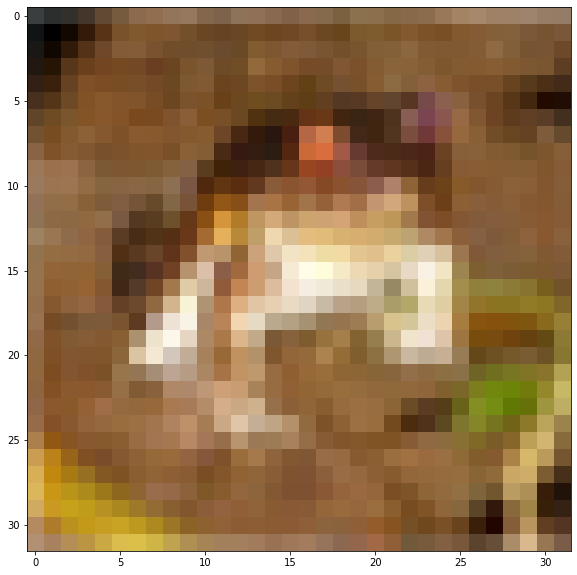

In [4]:
plt.imshow(X_train[0])

In [4]:
# normalizuojame
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, shuffle= True)

In [6]:
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_valid_one_hot = keras.utils.to_categorical(y_valid, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

In [7]:
import numpy as np
X_train = np.expand_dims(X_train, -1)
X_valid = np.expand_dims(X_valid, -1)
X_test = np.expand_dims(X_test, -1)

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=6, kernel_size=(5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(keras.layers.AveragePooling2D())
model.add(keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model.add(keras.layers.AveragePooling2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(120, activation='relu'))
model.add(keras.layers.Dense(84, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_2 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_3 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               30840     
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

In [10]:
h = model.fit(X_train, y_train_one_hot, validation_data=(X_valid, y_valid_one_hot), epochs=10, batch_size=32)

Epoch 1/10
1688/1688 [==============================] - 17s 10ms/step - loss: 0.2538 - accuracy: 0.9213 - val_loss: 0.0969 - val_accuracy: 0.9700
Epoch 2/10
1688/1688 [==============================] - 17s 10ms/step - loss: 0.0822 - accuracy: 0.9745 - val_loss: 0.0771 - val_accuracy: 0.9778
Epoch 3/10
1688/1688 [==============================] - 17s 10ms/step - loss: 0.0577 - accuracy: 0.9818 - val_loss: 0.0621 - val_accuracy: 0.9823
Epoch 4/10
1688/1688 [==============================] - 17s 10ms/step - loss: 0.0451 - accuracy: 0.9854 - val_loss: 0.0550 - val_accuracy: 0.9838
Epoch 5/10
1688/1688 [==============================] - 16s 10ms/step - loss: 0.0375 - accuracy: 0.9875 - val_loss: 0.0526 - val_accuracy: 0.9843
Epoch 6/10
1688/1688 [==============================] - 16s 9ms/step - loss: 0.0313 - accuracy: 0.9896 - val_loss: 0.0560 - val_accuracy: 0.9837
Epoch 7/10
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0261 - accuracy: 0.9918 - val_loss: 0.0533 - 

In [11]:
model.evaluate(X_test, y_test_one_hot)

313/313 [==============================] - 1s 4ms/step - loss: 0.0475 - accuracy: 0.9872


[0.04750644788146019, 0.9872000217437744]